In [1]:
#-----------------------------------------
# importamos los paquetes que vamos a usar
#-----------------------------------------

import pypulse as pulsar

import matplotlib.mlab as mlab
import matplotlib as mpl
import matplotlib.pyplot as plt     # para graficar
from matplotlib import pyplot

from scipy.optimize import curve_fit
import scipy.integrate as integrate

import math
import decimal
import numpy as np
import glob                         # para hacer listas de archivo
import subprocess                   # para usar subprocesos

import pandas as pd

import os
import shutil

In [2]:
def f(x, n):
    
    S0 = np.mean(sn)
    return [( ((x_i  * n / S0)**(n)) / (x_i * math.gamma(n)) )  * math.exp( (-1.0 * x_i * n) / S0 ) * np.heaviside(x_i, 0) for x_i in x]

In [26]:
def f2(x, n, norm):
    
    S0 = np.mean(sn)
    return [( ((x_i  * n / S0)**(n)) / (x_i * math.gamma(n)) )  * math.exp( (-1.0 * x_i * n) / S0 ) * np.heaviside(x_i, 0) * norm for x_i in x]

In [1]:
timfile = "timing_tmin0_snmin0_crit10000.tim"
#timfile = "timing_tmin40_snmin40_crit100.tim"

file = np.loadtxt( timfile , skiprows=1 , dtype=str , usecols=(0) )             # nombre de cada observación
freq = np.loadtxt( timfile, skiprows=1, dtype=float , usecols=(1) )             # frecuencia de la observación
MJD = np.loadtxt( timfile , skiprows=1 , dtype=decimal.Decimal , usecols=(2) )  # fecha juliana modificada de la observación
err = np.loadtxt( timfile , skiprows=1 , dtype=float,  usecols=(3) )          # error en el TOA
telescope = np.loadtxt( timfile, skiprows=1, dtype=str, usecols=(4) )           # antena usada (A1 o A2)

datafile = "results_total_latest.txt"
files = np.loadtxt( datafile , skiprows=0 , dtype=str , usecols=(0) )
sn_obs = np.loadtxt( datafile , skiprows=0 , dtype=float , usecols=(1) )
t_obs = np.loadtxt( datafile , skiprows=0 , dtype=float , usecols=(2) )

NameError: name 'np' is not defined

In [ ]:
ant = "A2"
tmin = (2500/60)/2

sn = []
tobs = []
t_max = np.amax(t_obs)
nobs = 0


# clasificamos a las observaciones según su antena


k=0
for k in range(len(file)):
    
    if ant == "A1":
    
        if telescope[k] == "iar1" and t_obs[ np.where(files == file[k])[0][0] ] > tmin:
            sn.append(float(sn_obs[ np.where(files == file[k])[0][0] ] / math.sqrt(t_max / t_obs[ np.where(files == file[k])[0][0] ]) ))
            tobs.append(float(t_obs[ np.where(files == file[k])[0][0] ]))
            nobs += 1
        
    elif ant == "A2":
    
        if telescope[k] == "iar2" and t_obs[ np.where(files == file[k])[0][0] ] > tmin:
            sn.append(float(sn_obs[ np.where(files == file[k])[0][0] ] / math.sqrt(t_max / t_obs[ np.where(files == file[k])[0][0] ]) ))
            tobs.append(float(t_obs[ np.where(files == file[k])[0][0] ]))
            nobs += 1
            
    elif ant == "A1+A2":
    
        if t_obs[ np.where(files == file[k])[0][0] ] > tmin:
            sn.append(float(sn_obs[ np.where(files == file[k])[0][0] ] / math.sqrt(t_max / t_obs[ np.where(files == file[k])[0][0] ]) ))
            tobs.append(float(t_obs[ np.where(files == file[k])[0][0] ]))
            nobs += 1
    
        
    else:
        print("error")   
        
print("Numero de observaciones = " + str(nobs))

In [ ]:
#------------------------------------
# Graficamos
#------------------------------------
        
plt.close()

# Set the fonts. Always use big fonts.
nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 30,
        "font.size": 28,
        "axes.linewidth": 1.5,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 32,
        "xtick.labelsize": 28,
        "ytick.labelsize": 28,
}
# Update the fonts
mpl.rcParams.update(nice_fonts)


plt.figure(figsize=(14,10))
plt.grid()
    
bin_width = 20
plt.xticks(np.arange(0, 300 , 20))
bins = np.arange(0, 300 , bin_width)

plt.hist(sn, bins, edgecolor='black', linewidth=1.2, label=ant)

#x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
#plt.plot(x_interval_for_fit, f(x_interval_for_fit, 2.18), label='fit')

plt.legend(loc='upper right')

plt.xlabel('Projected S/N')
plt.ylabel('Counts')
plt.show()

plt.close()

In [2]:
# normalizamos el histogram

bin_heights, bin_borders, _ = plt.hist(sn, bins, edgecolor='black', linewidth=1.2, label=ant)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)

norm = np.sum(bin_heights) * (bins[1] - bins[0])
bin_heights_norm = bin_heights / norm

NameError: name 'plt' is not defined

In [67]:
# Fitting the curve and plotting it

popt, pcov2 = curve_fit(f, bin_centers, bin_heights_norm, p0=[2.18])
print(popt, pcov2)

[ 2.15509141] [[ 0.09470511]]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


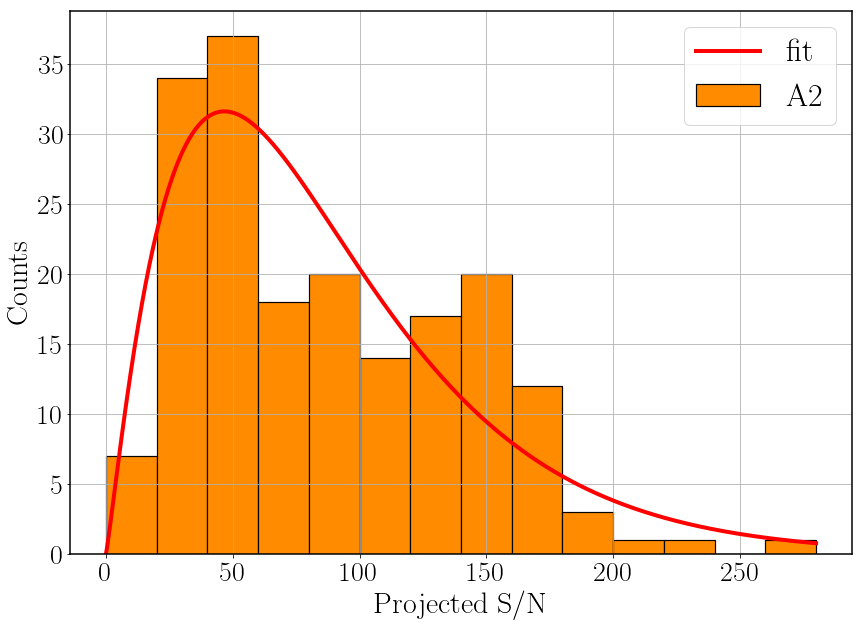

In [68]:
plt.close()

# Set the fonts. Always use big fonts.
nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 30,
        "font.size": 28,
        "axes.linewidth": 1.5,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 32,
        "xtick.labelsize": 28,
        "ytick.labelsize": 28,
}
# Update the fonts
mpl.rcParams.update(nice_fonts)


plt.figure(figsize=(14,10))
plt.grid()

if ant == "A1":
    col = "C0" 
elif ant == "A2":
    col = "darkorange"      
elif ant == "A1+A2":
    col = "green"


x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, f2(x_interval_for_fit, *popt, norm), label='fit', lw=4, color='red')
plt.bar(bin_centers, bin_heights_norm * norm, width=bin_width, bottom=None, align='center', color=col, edgecolor='black', linewidth=1.2, label=ant)
#plt.scatter(bin_centers, bin_heights_norm * norm, label=ant)
plt.legend(loc='upper right')

plt.xlabel('Projected S/N')
plt.ylabel('Counts')

plt.savefig('histograma_scintillation' + ant + '_3.pdf', bbox_inches='tight')
plt.savefig('histograma_scintillation' + ant + '_3.png', bbox_inches='tight')

plt.show()


In [24]:
popt_A1, pcov_A1 = curve_fit(f, tobs_A1, sn_A1)
popt_A2, pcov_A2 = curve_fit(f, tobs_A2, sn_A2)

print(popt_A1)
print(popt_A2)

t1 = np.arange(0.0, 220.0, 1)
t2 = np.arange(0.0, 220.0, 1)

f1 = popt_A1[0] * np.sqrt(t1)
f2 = popt_A2[0] * np.sqrt(t1)

[ 13.08563522]
[ 11.09459278]


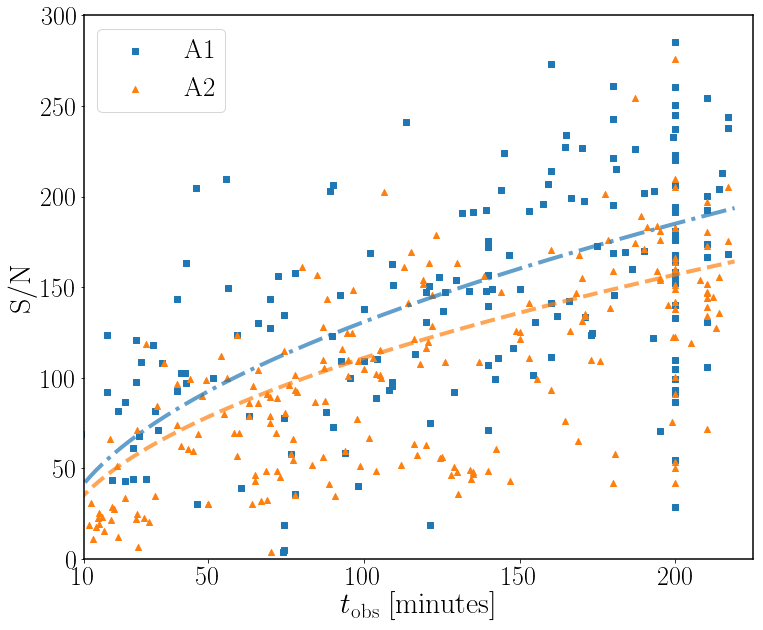

In [36]:
plt.close()

# Set the fonts. Always use big fonts.
nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 30,
        "font.size": 28,
        "axes.linewidth": 1.5,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 32,
        "xtick.labelsize": 26,
        "ytick.labelsize": 26,
}
# Update the fonts
mpl.rcParams.update(nice_fonts)
#plt.tight_layout()


plt.figure(figsize=(12,10))

plt.xlim(10, 225)     # set the xlim to left, right
plt.ylim(0,300)
plt.xticks([10, 50, 100, 150, 200])


plt.rc('text', usetex=True)
plt.rc('font', family='serif', size="22")
plt.rc('lines', linewidth=1.2)

plt.plot(t1, f1, linewidth=4, ls = '-.', alpha=0.7)
plt.plot(t2, f2, linewidth=4, ls = '--', alpha=0.7)

plt.scatter(tobs_A1, sn_A1, label= 'A1', marker="s")
plt.scatter(tobs_A2, sn_A2, label= 'A2', marker="^")

#plt.axvline(200, ls='-.')
#plt.axvline(210, ls='--')
#plt.axvline(220, ls='-')

plt.legend( loc='upper left', fontsize=27)

plt.xlabel('$t_\mathrm{obs}$ [minutes]')
plt.ylabel('S/N')
plt.savefig('plot_tobs_total.pdf', bbox_inches='tight')
plt.savefig('plot_tobs_total.png', bbox_inches='tight')
plt.show()